In [239]:
%matplotlib inline
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import seaborn as sns

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [240]:
## load data in the folder in the list (weekly)
path ='D:\Data Science\data_eatopia_week_sepoct' # use your path

def read_files(files_path):
    allFiles = natural_sort(glob.glob(files_path + "/*.csv"))
    all_combined_frame = pd.DataFrame()
    list_files = []
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0)
        df.drop(['SKU', 'COGS', 'Refund'], axis=1, inplace=True)
        df.columns = ['Item', 'Variant', 'Category','Item_Sold','Gross_Sales', 'Discount', 'Net_Sales', 'Gross_Profit', 'Gross_Margin']
   
        df['Item_Variant'] = df[['Item','Variant']].astype(str).apply(lambda x: ' '.join(pd.unique(' '.join(x).split())),axis=1)
        df.drop(df.index[-1], inplace=True)
        df['Item_Percentage'] = df['Item_Sold'] * 100 / df['Item_Sold'].sum()
        #df['Category_Percentage'] = df.groupby(['Category']).sum() * 100 / df['Item_Sold'].sum()
    
        df = df[['Item_Variant','Item', 'Variant', 'Category', 'Item_Sold','Gross_Sales', 'Discount', 'Net_Sales', 'Gross_Profit', 'Gross_Margin', 'Item_Percentage']]

        list_files.append(df)
        
    all_combined_frame = pd.concat(list_files)

    return allFiles, all_combined_frame, list_files

allFiles, all_combined_frame, list_files = read_files(path)

num_files = len(list_files)             
print('Folder contains "%d" Files'%num_files)

#list_files[0].sort_values(by=['Category'])


Folder contains "16" Files


In [241]:
for dataframe in list_files:
    dataframe.drop(['Item','Variant','Gross_Sales', 'Discount', 'Net_Sales', 'Gross_Profit', 'Gross_Margin','Item_Sold'], axis = 1, inplace = True)
    
#list_files[-1].sort_values(by=['Category']).Category.unique()

In [243]:
combined_df_percentage = list_files[0].sort_values(by=['Category'])
#list_files[0].groupby(['Category']).sum()
categorized_df_percentage = pd.pivot_table(combined_df_percentage,index=["Category","Item_Variant"],values=["Item_Percentage"])

for dataframe in list_files[1:]:
    
    combined_df_percentage = pd.merge(combined_df_percentage, dataframe, how='outer', on=['Item_Variant','Category'],suffixes=('_1', '_2'))
    
combined_df_percentage = combined_df_percentage.fillna(0)
combined_df_percentage = combined_df_percentage.groupby(['Category']).sum()

for dataframe2 in list_files[1:]:
    dataframe2 = pd.pivot_table(dataframe2,index=["Category","Item_Variant"],values=["Item_Percentage"])
    categorized_df_percentage = categorized_df_percentage.merge( dataframe2,  how='outer', left_index=True, right_index=True ,suffixes=('_1', '_2'))

categorized_df_percentage = categorized_df_percentage.fillna(0)

column_name = combined_df_percentage.columns

def column_name (column):
    week_name = []
    counter = 0
    for week in combined_df_percentage.columns:
        counter = counter + 1
        week = 'Week' + ' ' + str(counter)
        week_name.append(week)
        
    return week_name

column_name_list = column_name(column_name)


combined_df_percentage.columns = column_name_list
combined_df_percentage
categorized_df_percentage.columns = column_name_list

categorized_df_percentage.transpose()
#categorized_df_percentage.plot(figsize=(50,20))

#combined_category_df_percentage.transpose().plot(figsize=(50,20))

#categorized_df_percentage.transpose()
print(combined_df_percentage.index)
#categorized_df_percentage[categorized_df_percentage.index.get_level_values('Category').str.startswith('Chicken')]


Index(['Chicken ', 'Chocolate', 'Coffee', 'De kaas Deli', 'Extra',
       'Ice Blended', 'Indomie', 'Juice', 'Latte', 'Milkshake', 'Nasi Goreng',
       'Non-Coffee', 'Pasta', 'Rice Bowl', 'Smoothies', 'Snack',
       'Sparkling Soda', 'Special Today', 'Tea', 'Toko Bu Dewi',
       'Toko De kaas Deli', 'Toko Mas Gilang', 'Uncategorized'],
      dtype='object', name='Category')


In [260]:
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Chicken Gordon Bleu':'Chicken Cordon Bleu'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Americano Hot':'Americano'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Americano Iced':'Americano'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Cafe Latte Hot':'Cafe Latte'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Cafe Latte Iced':'Cafe Latte'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Cappuccino Hot':'Cappuccino'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Cappuccino Iced':'Cappuccino'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Caramel Machiato Cold':'Caramel Machiato Hot'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Kopi Tradisional Original Iced':'Kopi Tradisional Original'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Kopi Tradisional Original Hot':'Americano'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Kopi Tradisional Original Robusta':'Kopi Tradisional Spesial'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Kopi Tradisional Special Hot':'Kopi Tradisional Spesial'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Kopi Tradisional Original Arabica':'Kopi Tradisional Spesial'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mocha Cookies Caramel Hot':'Mocha Cookies Caramel'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mocha Cookies Caramel Cold':'Mocha Cookies Caramel'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mochaccino Cold':'Mochaccino Hot'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mojito Coffee Iced':'Mojito Coffee'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mojito Coffee Hot':'Mojito Coffee'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Vietnamese Coffee Iced':'Vietnam Drip'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Vietnamese Coffee Hot':'Vietnam Drip'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Caramel':'Caramel Ice Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Caramel Machiato':'Caramel Ice Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Choco Mint':'Choco Mint Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Choco Oreo':'Choco Oreo Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Dark Chocolate':'Dark Chocolate Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Hazelnut':'Hazelnut Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Matcha':'Matcha Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Red Velvet':'Red Velvet Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Taro':'Taro Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Tiramisu':'Tiramisu Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Vanilla':'Vanilla Blended'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Avocado':'Avocado Juice'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mango':'Mango Juice'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Orange':'Orange Juice'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Strawberry':'Strawberry Juice'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Caramel Hot':'Caramel Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Hazelnut Hot':'Hazelnut Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Hazelnut Latte Hot':'Hazelnut Latte Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Matcha Hot':'Matcha Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Matcha Latte Hot':'Matcha Latte Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Peppermint Hot':'Peppermint Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Red Velvet Hot':'Red Velvet Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Taro Hot':'Taro Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Tiramisu Hot':'Tiramisu Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Vanilla Hot':'Vanilla Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Vanilla Latte Hot':'Vanilla Latte Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Chocolate Hot':'Chocolate Cold'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Jeruk Hot':'Jeruk Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Jeruk Iced':'Jeruk'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Thai Tea Hot':'Thai Tea Iced'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Thai Tea Iced':'Thai Tea'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Avocado Juice':'Avocado Smoothies'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mango Juice':'Mango Smoothies'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Orange Juice':'Orange Smoothies'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Strawberry Juice':'Strawberry Smoothies'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Lychee':'Lychee Sparkling Soda'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Mojito':'Mojito Sparkling Soda'}}).groupby( ["Category","Item_Variant"], sort=False).sum()
categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Peach':'Peach Sparkling Soda'}}).groupby( ["Category","Item_Variant"], sort=False).sum()

categorized_df_percentage = categorized_df_percentage.reset_index().replace({"Item_Variant": {'Plain Tea':'Regular Tea Hot'}}).groupby( ["Category","Item_Variant"], sort=False).sum()




In [245]:

df2  = categorized_df_percentage[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('French Fries')].sum()
categorized_df_percentage=categorized_df_percentage.drop(categorized_df_percentage.index[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('French Fries')])

df2 = pd.DataFrame({'Week':df2.index, '':df2.values})
df2 = df2.transpose()

df2.drop(df2.index[1], inplace=True)

df2['Category'] = 'Snack'
df2['Item_Variant'] = 'French Fries'
df2.set_index('Category', append=True, inplace=True)
df2.set_index('Item_Variant', append=True, inplace=True)

df2 = df2.reset_index()
df2 = df2.drop(['level_0'], axis=1)
df2 = df2.set_index(['Category', 'Item_Variant'])
df2.columns = column_name_list

categorized_df_percentage = categorized_df_percentage.append(df2)



In [246]:
df2  = categorized_df_percentage[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('Pisang Bakar')].sum()
categorized_df_percentage=categorized_df_percentage.drop(categorized_df_percentage.index[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('Pisang Bakar')])

df2 = pd.DataFrame({'Week':df2.index, '':df2.values})
df2 = df2.transpose()

df2.drop(df2.index[1], inplace=True)

df2['Category'] = 'Snack'
df2['Item_Variant'] = 'Pisang Bakar'
df2.set_index('Category', append=True, inplace=True)
df2.set_index('Item_Variant', append=True, inplace=True)

df2 = df2.reset_index()
df2 = df2.drop(['level_0'], axis=1)
df2 = df2.set_index(['Category', 'Item_Variant'])
df2.columns = column_name_list

categorized_df_percentage = categorized_df_percentage.append(df2)

In [248]:
df2  = categorized_df_percentage[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('Pisang Goreng')].sum()
categorized_df_percentage=categorized_df_percentage.drop(categorized_df_percentage.index[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('Pisang Goreng')])

df2 = pd.DataFrame({'Week':df2.index, '':df2.values})
df2 = df2.transpose()

df2.drop(df2.index[1], inplace=True)

df2['Category'] = 'Snack'
df2['Item_Variant'] = 'Pisang Goreng'
df2.set_index('Category', append=True, inplace=True)
df2.set_index('Item_Variant', append=True, inplace=True)

df2 = df2.reset_index()
df2 = df2.drop(['level_0'], axis=1)
df2 = df2.set_index(['Category', 'Item_Variant'])
df2.columns = column_name_list

categorized_df_percentage = categorized_df_percentage.append(df2)

In [250]:
df2  = categorized_df_percentage[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('Ropang')].sum()
categorized_df_percentage=categorized_df_percentage.drop(categorized_df_percentage.index[categorized_df_percentage.index.get_level_values('Item_Variant').str.startswith('Ropang')])

df2 = pd.DataFrame({'Week':df2.index, '':df2.values})
df2 = df2.transpose()

df2.drop(df2.index[1], inplace=True)

df2['Category'] = 'Snack'
df2['Item_Variant'] = 'Ropang'
df2.set_index('Category', append=True, inplace=True)
df2.set_index('Item_Variant', append=True, inplace=True)

df2 = df2.reset_index()
df2 = df2.drop(['level_0'], axis=1)
df2 = df2.set_index(['Category', 'Item_Variant'])
df2.columns = column_name_list

categorized_df_percentage = categorized_df_percentage.append(df2)

In [262]:
categorized_df_percentage[categorized_df_percentage.index.get_level_values('Category').str.startswith('Toko Bu Dewi')]

Week 1    Week 2    Week 3  \
Category     Item_Variant                                                
Toko Bu Dewi Air Mineral                  6.538797  8.095676  9.364548   
             Camel Putih                  0.087184  0.000000  0.000000   
             Chitato KRIPZ                0.000000  0.000000  0.000000   
             Chitato Sapi Bumbu Bakar     0.000000  0.091996  0.000000   
             Chitato Sapi Panggang        0.087184  0.091996  0.000000   
             Djarum Super                 0.087184  0.000000  0.222965   
             Dji Sam Soe                  0.087184  0.000000  0.000000   
             Dunhill Putih                0.000000  0.091996  0.111483   
             Gudang Garam Filter          0.174368  0.183993  0.111483   
             Happy Tos                    0.000000  0.091996  0.000000   
             Happy Tos Tortilla Chips     0.000000  0.000000  0.000000   
             Kacang Atom Garuda           0.000000  0.000000  0.000000   
             Kerupuk Kecil                0.000000  0.091996  0.000000   
             Korek                        0.087184  0.091996  0.000000   
             Kusuka Keripik Emping Ori    0.087184  0.183993  0.000000   
             Marlboro Merah               0.087184  0.367985  0.111483   
             Marlboro Putih               0.261552  0.183993  0.222965   
             Oishi Pillow Coklat          0.000000  0.091996  0.000000   
             Oishi Sponge Coklat          0.000000  0.000000  0.111483   
             Piattos Barbeque             0.000000  0.183993  0.000000   
             Piattos Sapi Panggang        0.087184  0.091996  0.000000   
             Qtela Singkong               0.000000  0.091996  0.000000   
             Sampoerna Mild               0.871840  0.827967  1.003344   
             Sea Crunch                   0.000000  0.000000  0.000000   
             Smax Ring Cheese             0.000000  0.091996  0.334448   
             Sosis Solo                   0.000000  0.000000  0.891862   
             Teh Pucuk                    0.000000  1.839926  0.000000   
             Tortilla Chips Grilled Beef  0.000000  0.000000  0.111483   
             Tortilla Chips Nacho Cheese  0.087184  0.000000  0.000000   
             Tortilla Chips Roasted Corn  0.000000  0.091996  0.000000   
             cheese stick                 0.000000  0.275989  0.111483   
             kacang medan                 0.000000  0.275989  0.445931   
             kerupuk putih                0.000000  0.551978  0.334448   
             kerupuk udang                0.000000  0.275989  0.222965   
             samosa                       0.000000  0.000000  0.000000   

                                            Week 4    Week 5    Week 6  \
Category     Item_Variant                                                
Toko Bu Dewi Air Mineral                  7.302231  7.812500  9.896324   
             Camel Putih                  0.000000  0.082237  0.094251   
             Chitato KRIPZ                0.000000  0.082237  0.000000   
             Chitato Sapi Bumbu Bakar     0.000000  0.000000  0.000000   
             Chitato Sapi Panggang        0.000000  0.000000  0.282752   
             Djarum Super                 0.101420  0.000000  0.000000   
             Dji Sam Soe                  0.101420  0.000000  0.094251   
             Dunhill Putih                0.000000  0.246711  0.000000   
             Gudang Garam Filter          0.101420  0.082237  0.000000   
             Happy Tos                    0.101420  0.000000  0.000000   
             Happy Tos Tortilla Chips     0.000000  0.000000  0.000000   
             Kacang Atom Garuda           0.000000  0.411184  0.094251   
             Kerupuk Kecil                0.000000  0.246711  0.094251   
             Korek                        0.101420  0.246711  0.000000   
             Kusuka Keripik Emping Ori    0.000000  0.000000  0.000000   
             Marlboro Merah               0.000

In [268]:

categorized_df_percentage.to_csv('categorized_df_percentage.csv')

KeyError: 'Category'

In [266]:
combined_df_percentage = combined_df_percentage.reset_index().replace({"Category": {'Mie':'Indomie'}}).groupby("Category", sort=False).sum()
combined_df_percentage = combined_df_percentage.reset_index().replace({"Category": {'Latte':'Latte/Chocolate'}}).groupby("Category", sort=False).sum()
combined_df_percentage = combined_df_percentage.reset_index().replace({"Category": {'Chocolate':'Latte/Chocolate'}}).groupby("Category", sort=False).sum()
combined_df_percentage = combined_df_percentage.drop(['Toko De kaas Deli', 'De kaas Deli', 'Toko Mas Gilang', 'Uncategorized','Extra'])

combined_df_percentage

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16
Category,,,,,,,,,,,,,,,,
Chicken,2.092415,2.299908,2.229654,1.115619,0.986842,1.696513,1.1,1.611665,1.970443,3.080569,2.195946,1.940994,2.206462,2.954210,1.652893,1.699029
Latte/Chocolate,3.400174,2.207912,2.452620,1.419878,2.138158,2.450518,2.2,1.381427,1.477833,1.026856,1.266892,1.708075,2.600473,1.920236,1.652893,1.456311
Coffee,5.841325,7.727691,6.577480,5.375254,9.292763,8.953817,8.6,4.681504,6.305419,7.030016,6.418919,8.928571,4.806935,5.465288,7.438017,7.402913
Ice Blended,6.102877,4.415823,3.232999,3.346856,3.700658,2.073516,2.8,2.455871,1.280788,1.184834,2.364865,2.950311,3.152088,0.886263,1.487603,1.941748
Indomie,7.236269,8.003680,8.695652,8.316430,7.812500,6.786051,9.2,4.374520,9.359606,11.374408,11.486486,7.686335,8.431836,7.237814,7.851240,6.189320
Juice,4.620750,5.887764,5.574136,4.259635,3.865132,4.618285,2.8,2.993093,2.955665,4.897314,3.547297,3.338509,5.279748,3.988183,5.123967,3.762136
Milkshake,0.610288,0.643974,0.780379,1.419878,1.398026,0.659755,1.1,0.920952,0.394089,1.342812,0.929054,0.698758,0.945626,2.806499,1.074380,1.456311
Nasi Goreng,7.061901,7.359706,6.911929,6.997972,6.990132,4.995287,6.6,5.679202,7.093596,7.661927,8.361486,8.074534,9.692671,10.118168,9.504132,9.466019
Non-Coffee,3.138622,2.575897,2.898551,3.245436,2.713816,3.864279,4.5,3.914045,5.221675,4.265403,4.645270,5.124224,3.861308,5.686854,4.214876,3.640777


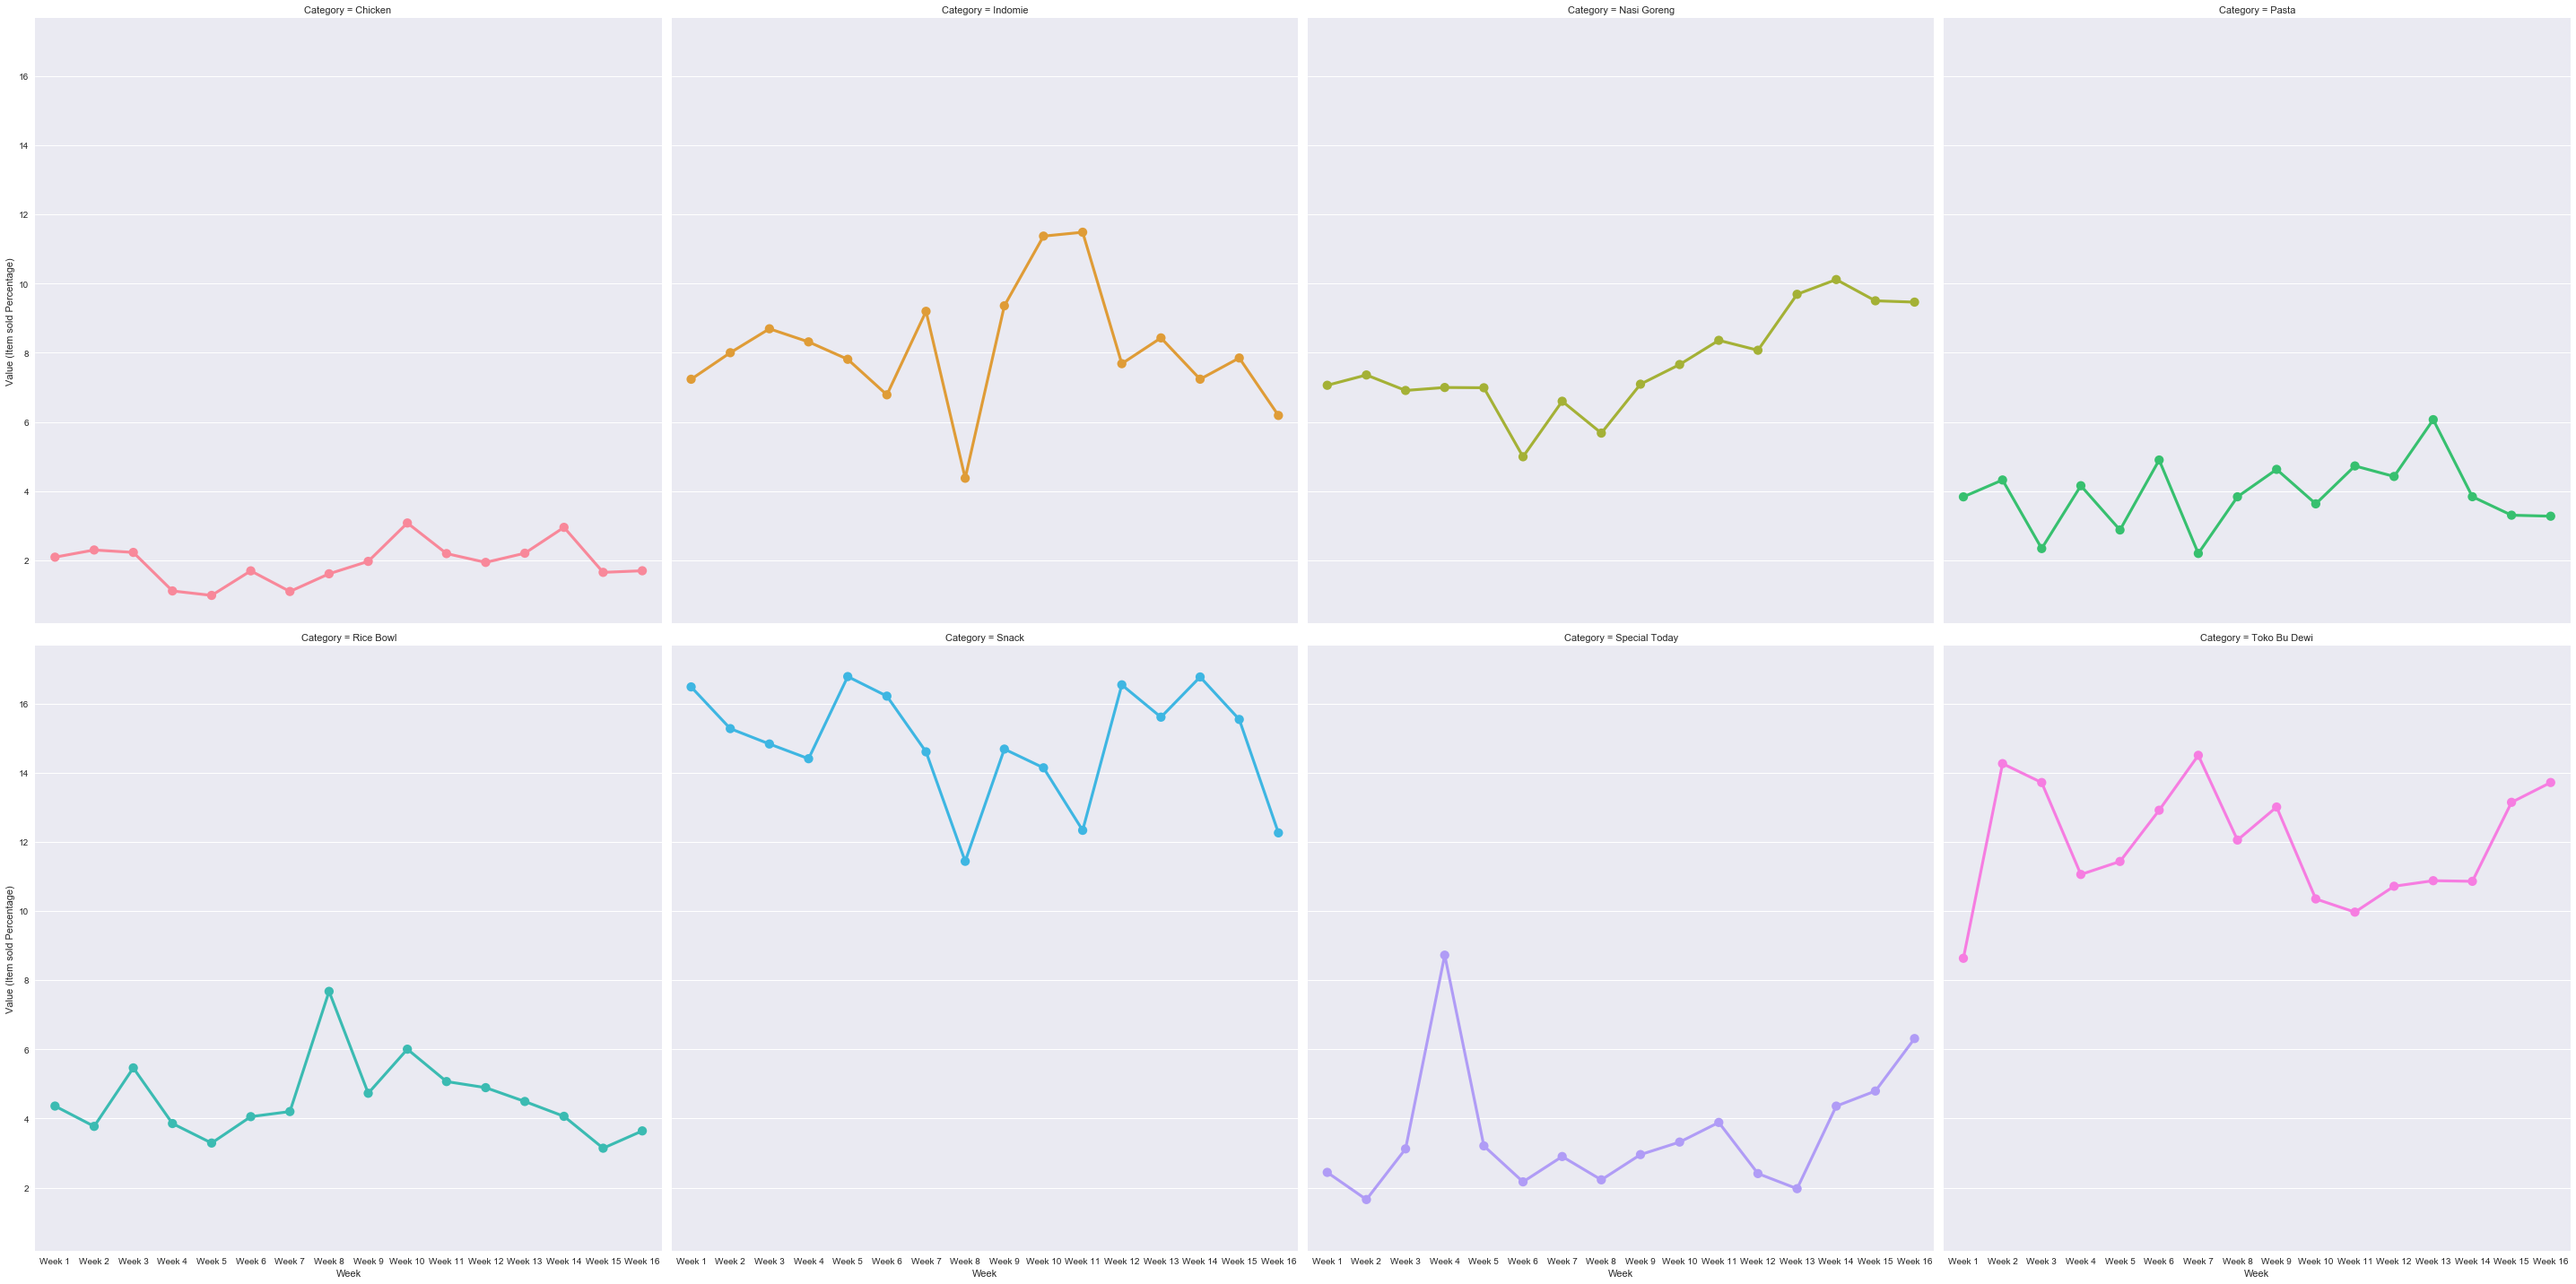

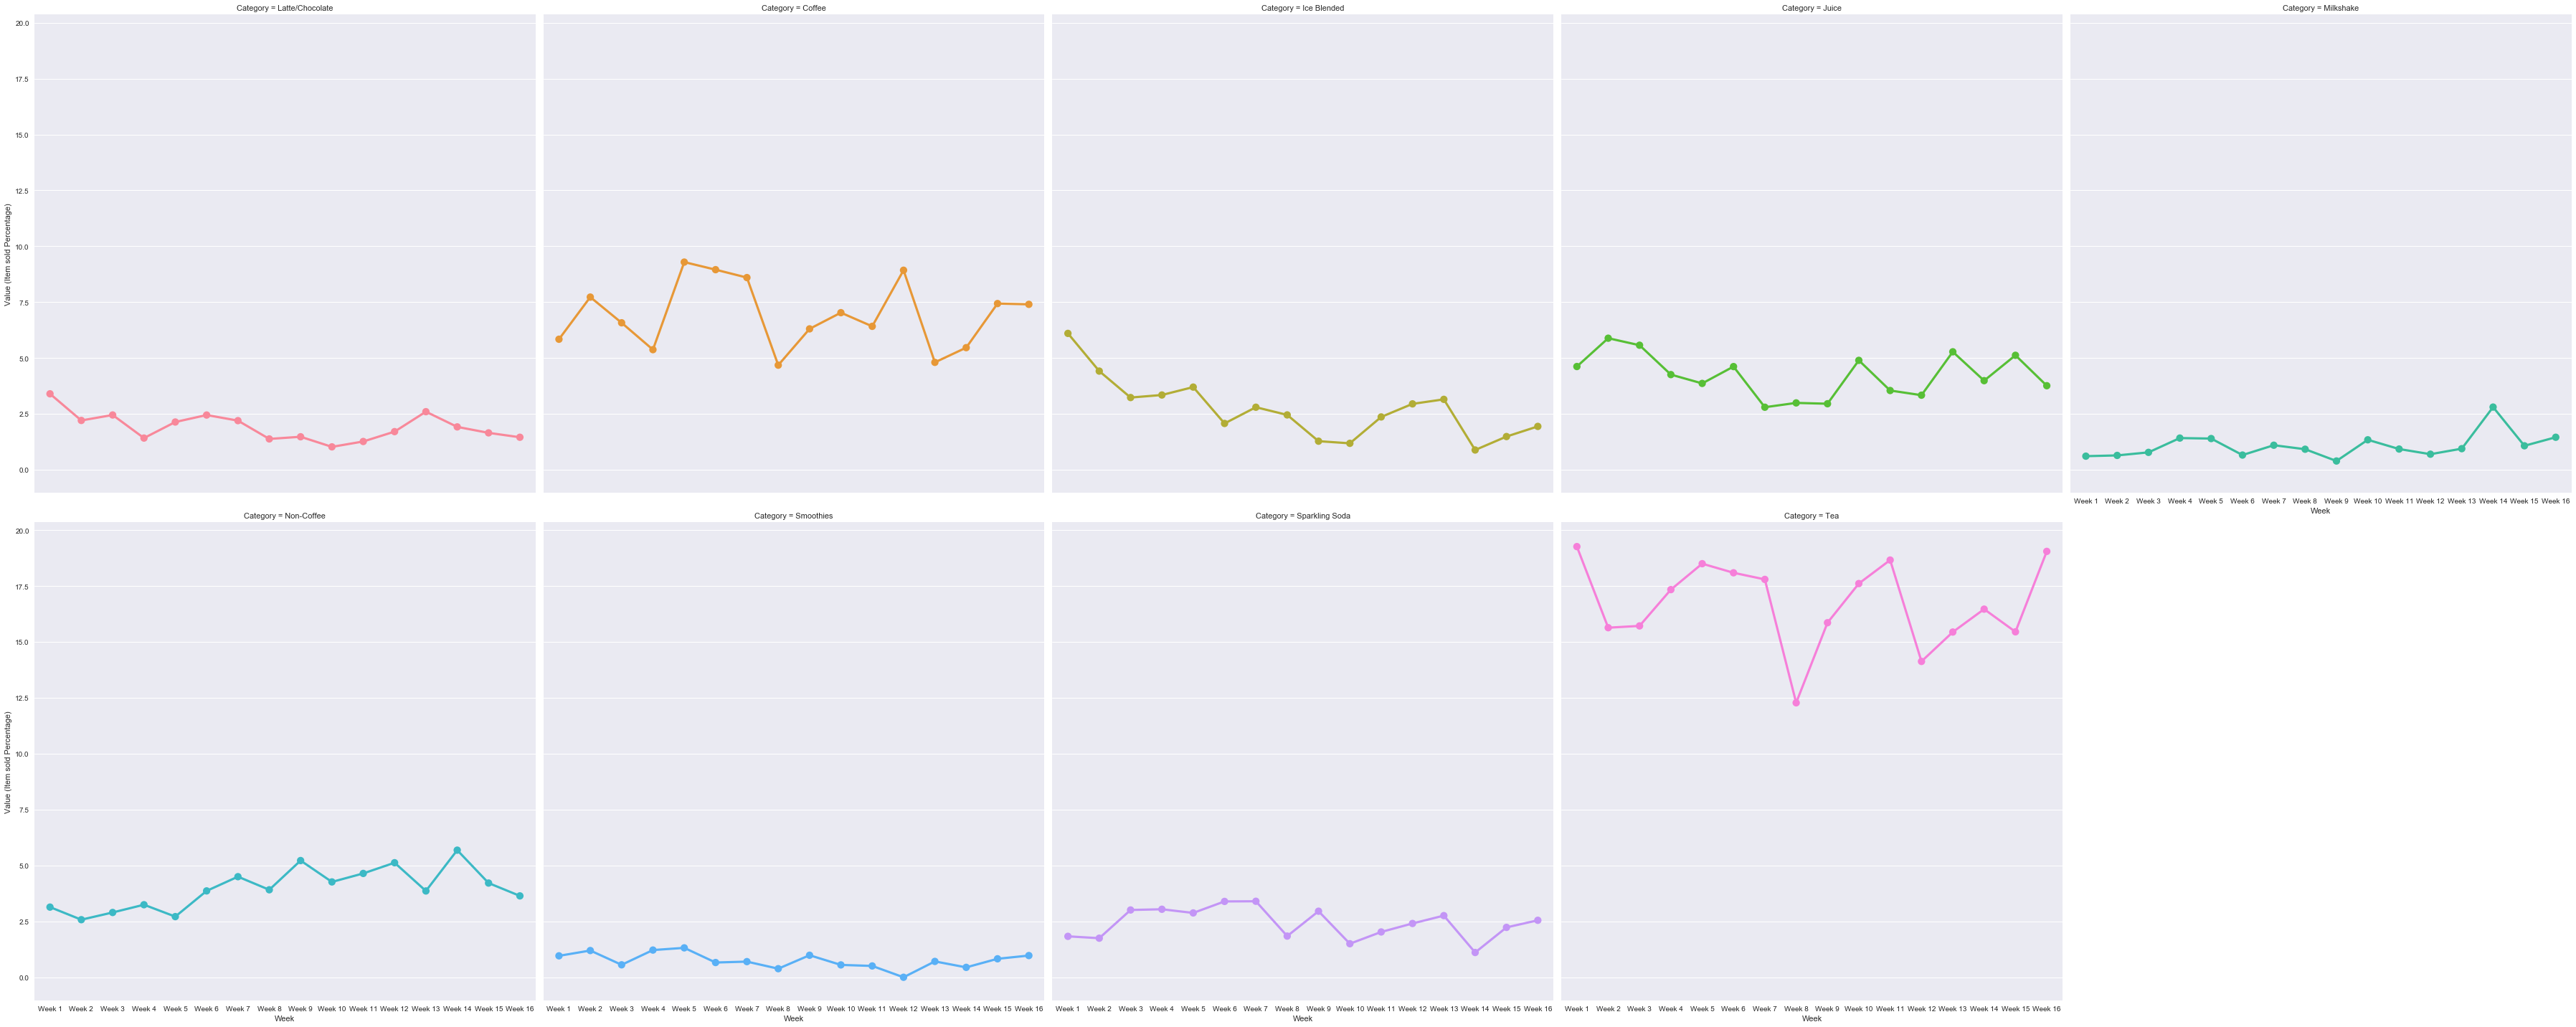

In [267]:
combined_df_percentage_main_course = combined_df_percentage
combined_df_percentage_side_menu = combined_df_percentage
combined_df_percentage_drinks_menu = combined_df_percentage

main_course_list = ['Chicken ','Indomie','Nasi Goreng','Pasta','Rice Bowl','Special Today','Snack','Toko Bu Dewi']
#drink_list = ['Chicken','Indomie','Nasi Goreng','Pasta','Rice Bowl']
#side_menu_list = ['Extra']

combined_df_percentage_main_course= combined_df_percentage_main_course[combined_df_percentage_main_course.index.isin(main_course_list)]
combined_df_percentage_main_course.reset_index(inplace = True)
combined_df_percentage_main_course = pd.melt(combined_df_percentage_main_course, id_vars=['Category'], var_name='Week',  value_name='Value (Item sold Percentage)')

combined_df_percentage_main_course
g = sns.factorplot(x = 'Week' , y= 'Value (Item sold Percentage)', col="Category", hue="Category", margin_titles = True, data=combined_df_percentage_main_course, col_wrap=4, size=10 )
#g = sns.FacetGrid(combined_df_percentage_main_course, col="Category") 
#g.map(sns.pointplot, x='Week', y='Value (Item sold Percentage)')
#
combined_df_percentage_drinks_menu= combined_df_percentage_drinks_menu[~combined_df_percentage_drinks_menu.index.isin(main_course_list)]
combined_df_percentage_drinks_menu.reset_index(inplace = True)
combined_df_percentage_drinks_menu = pd.melt(combined_df_percentage_drinks_menu, id_vars=['Category'], var_name='Week',  value_name='Value (Item sold Percentage)')

combined_df_percentage_drinks_menu
f = sns.factorplot(x = 'Week' , y= 'Value (Item sold Percentage)', col="Category", hue="Category", margin_titles = True, data=combined_df_percentage_drinks_menu, col_wrap=5, size=10 )
combined_df_percentage.to_csv('combined_df_percentage.csv')